# FUZZY LOGIC

In [ ]:
!pip install bs4==0.0.1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 22.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=29333c8dc12eebe62909b23e47a6827803924f03e2f776c21edfb59c7b5bbea4
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd

import random
import re
import pickle
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
import re
import numpy as np
from nltk.corpus import stopwords 
import collections
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install contractions
import contractions

#Sentiment
from textblob import TextBlob

#POS Tagging
import nltk
nltk.download("popular")
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from collections import Counter
stop_words = set(stopwords.words('english')) 
import re
#Pre-Processing Imports
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re, sys

#Text Feature Generation
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 57.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_d

### VISUALISE DATA

In [ ]:
data = pd.read_csv("reviews.csv",sep="\t")
data

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,1.440988e+09,193.93.167.87
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,Y,five star,it's great,2015-08-31,1.441002e+09,193.93.167.87
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,1.440959e+09,193.93.167.87
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,Y,Work very well,Work very well,2015-08-31,1.441015e+09,193.93.167.87
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,1.440973e+09,205.10.168.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",2002-04-03,1.017782e+09,201.30.21.211
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,N,N,Well worth [it],We live in an apartment with hardwood floors a...,2002-03-05,1.015341e+09,216.59.233.79
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2002-02-19,1.014068e+09,209.193.182.91
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,2002-01-06,1.010282e+09,205.32.108.104


In [ ]:
#data=data[0:500]

In [ ]:
data


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,1.440988e+09,193.93.167.87
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,Y,five star,it's great,2015-08-31,1.441002e+09,193.93.167.87
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,1.440959e+09,193.93.167.87
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,Y,Work very well,Work very well,2015-08-31,1.441015e+09,193.93.167.87
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,1.440973e+09,205.10.168.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",2002-04-03,1.017782e+09,201.30.21.211
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,N,N,Well worth [it],We live in an apartment with hardwood floors a...,2002-03-05,1.015341e+09,216.59.233.79
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2002-02-19,1.014068e+09,209.193.182.91
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,2002-01-06,1.010282e+09,205.32.108.104


In [ ]:
list(data.columns)

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date',
 'timestamp',
 'IP Address']

In [ ]:
data.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
dtype: object

### PREPROCESSING

In [ ]:
data['review_body'] = data['review_body'].apply(str)

In [ ]:
# REMOVE EMOJIS FROM TEXT
data['review_body'] = data['review_body'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
#fix contractions
def fixContra(text):
    return contractions.fix(text)

data['review_body'] = data['review_body'].apply(lambda x: fixContra(x))

In [ ]:
# Remove Special Character

In [ ]:
# \W represents Special characters
data['review_body'] = data['review_body'].str.replace('\W', ' ')
data['review_headline'] = data['review_headline'].str.replace('\W', ' ')

# \d represents Numeric digits
data['review_body'] = data['review_body'].str.replace('\d', ' ')
data['review_headline'] = data['review_headline'].str.replace('\d', ' ')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [ ]:
# Upper to lower case
data['review_body'] = data['review_body'].str.lower()
data['review_headline'] = data['review_headline'].str.lower()

# Feature Engineering

In [ ]:
df=data

In [ ]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,Y,very happy,as advertised everything works perfectly i a...,2015-08-31,1.440988e+09,193.93.167.87
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,Y,five star,it is great,2015-08-31,1.441002e+09,193.93.167.87
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,Y,great cables,these work great and fit my life proof case fo...,2015-08-31,1.440959e+09,193.93.167.87
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,Y,work very well,work very well,2015-08-31,1.441015e+09,193.93.167.87
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,N,Y,cameras has battery issues,be careful with these products i have bought ...,2015-08-31,1.440973e+09,205.10.168.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,N,N,the cat barf is gone,i have been looking for a while for the pur...,2002-04-03,1.017782e+09,201.30.21.211
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,N,N,well worth it,we live in an apartment with hardwood floors a...,2002-03-05,1.015341e+09,216.59.233.79
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,N,N,its a time saver,i received this for a birthday present and its...,2002-02-19,1.014068e+09,209.193.182.91
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,N,N,got stains,i got the dirt devil spot scrubber for a gift ...,2002-01-06,1.010282e+09,205.32.108.104


### Sentiment score generation

In [ ]:
reviews = df['review_body'].tolist()
#print(reviews)
sentiment_score = []
sentiment_subjectivity=[]
review_head_sentiment=[]
for rev in reviews:
    testimonial = TextBlob(rev)
    sentiment_score.append(testimonial.sentiment.polarity)
    sentiment_subjectivity.append(testimonial.sentiment.subjectivity)

In [ ]:
df['Sentiment'] = sentiment_score
df['Subjectivity'] = sentiment_subjectivity
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address,Sentiment,Subjectivity
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,Y,very happy,as advertised everything works perfectly i a...,2015-08-31,1.440988e+09,193.93.167.87,1.000000,1.000000
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,Y,five star,it is great,2015-08-31,1.441002e+09,193.93.167.87,0.800000,0.750000
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,Y,great cables,these work great and fit my life proof case fo...,2015-08-31,1.440959e+09,193.93.167.87,0.600000,0.575000
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,Y,work very well,work very well,2015-08-31,1.441015e+09,193.93.167.87,0.200000,0.300000
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,N,Y,cameras has battery issues,be careful with these products i have bought ...,2015-08-31,1.440973e+09,205.10.168.66,0.079167,0.666667


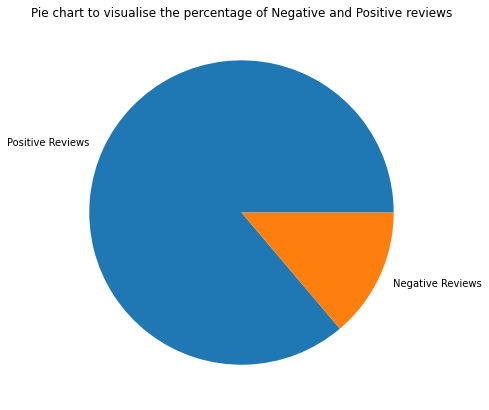

In [ ]:
pos = 0
neg = 0
for score in df['Sentiment']:
    if score > 0:
        pos += 1
    elif score < 0:
        neg += 1

#Visualiing the distribution of Sentiment
values = [pos, neg]
label = ['Positive Reviews', 'Negative Reviews']

fig = plt.figure(figsize =(10, 7))
plt.title("Pie chart to visualise the percentage of Negative and Positive reviews") 
plt.pie(values, labels = label)

plt.show()

In [ ]:
#Number of Negative words in a review
reviews = df['review_body'].tolist()
negative_count = []
for rev in reviews:
    words = rev.split()
    neg = 0
    for w in words:
        testimonial = TextBlob(w)
        score = testimonial.sentiment.polarity
        if score < 0:
            neg += 1
    negative_count.append(neg)

In [ ]:
df['Neg_Count'] = negative_count

In [ ]:
# Unique words count
#Word Count
df['Word_Count'] = df['review_body'].str.split().str.len()

In [ ]:
reviews = df['review_body'].str.lower().str.split()

# Get amount of unique words
df['Unique_words'] = reviews.apply(set).apply(len)
#data['Unique_words'] = data[['Unique_words']].div(data.Word_Count, axis=0)

In [ ]:
Review_text = df.review_body

array_Noun = []
array_Adj = []
array_Verb = []
array_Adv = []
array_Pro = []
array_Pre = []
array_Con = []
array_Art = []
array_Nega = []
array_Aux = []

articles = ['a', 'an', 'the']
negations = ['no', 'not', 'none', 'nobody', 'nothing', 'neither', 'nowhere', 'never', 'hardly', 'barely', 'scarcely']
auxilliary = ['am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'will', 'would', 'shall', 'should', 'may', 'might', 'must', 'can', 'could', 'do', 'does', 'did', 'have', 'having', 'has', 'had']

for j in Review_text:
    text = j ;
    filter=re.sub('[^\w\s]', '', text)
    conver_lower=filter.lower()
    Tinput = conver_lower.split(" ")
    
    for i in range(0, len(Tinput)):
        Tinput[i] = "".join(Tinput[i])
    UniqW = Counter(Tinput)
    s = " ".join(UniqW.keys())
    
    tokenized = sent_tokenize(s)
    
    for i in tokenized:
        wordsList = nltk.word_tokenize(i)
        #wordsList = [w for w in wordsList if not w in stop_words]
        
        Art = 0
        Nega = 0
        Aux = 0
        for word in wordsList:
            if word in articles:
                Art += 1
            elif word in negations:
                Nega += 1
            elif word in auxilliary:
                Aux += 1
                
        tagged = nltk.pos_tag(wordsList)
        counts = Counter(tag for word,tag in tagged)

        N = sum([counts[i] for i in counts.keys() if 'NN' in i])
        Adj = sum([counts[i] for i in counts.keys() if 'JJ' in i])
        Verb = sum([counts[i] for i in counts.keys() if 'VB' in i])
        Adv = sum([counts[i] for i in counts.keys() if 'RB' in i])
        Pro = sum([counts[i] for i in counts.keys() if (('PRP' in i) or ('PRP$' in i) or ('WP' in i) or ('WP$' in i))])
        Pre = sum([counts[i] for i in counts.keys() if 'IN' in i])
        Con = sum([counts[i] for i in counts.keys() if 'CC' in i])

        array_Noun.append(N)
        array_Adj.append(Adj)
        array_Verb.append(Verb)
        array_Adv.append(Adv)
        array_Pro.append(Pro)
        array_Pre.append(Pre)
        array_Con.append(Con)
        array_Art.append(Art)
        array_Nega.append(Nega)
        array_Aux.append(Aux)
print('Completed')

Completed


In [ ]:
POS = ['Noun_Count', 'Adj_Count', 'Verb_Count', 'Adv_Count', 'Pro_Count', 'Pre_Count', 'Con_Count', 'Art_Count', 'Nega_Count', 'Aux_Count']
Values = [array_Noun, array_Adj, array_Verb, array_Adv, array_Pro, array_Pre, array_Con, array_Art, array_Nega, array_Aux]
i = 0
for x in POS:
    df[x] = pd.Series(Values[i])
    df[x] = df[x].fillna(0)
    df[x] = df[x].astype(float)
    i += 1

In [ ]:
# authenticity
df = df.assign(Authenticity = lambda x: (x.Pro_Count + x.Unique_words - x.Neg_Count) / x.Word_Count)

In [ ]:
# analytical thinking
df = df.assign(AT = lambda x: 30 + (x.Art_Count + x.Pre_Count - x.Pro_Count - x.Aux_Count - x.Con_Count - x.Adv_Count - x.Nega_Count))

<AxesSubplot:>

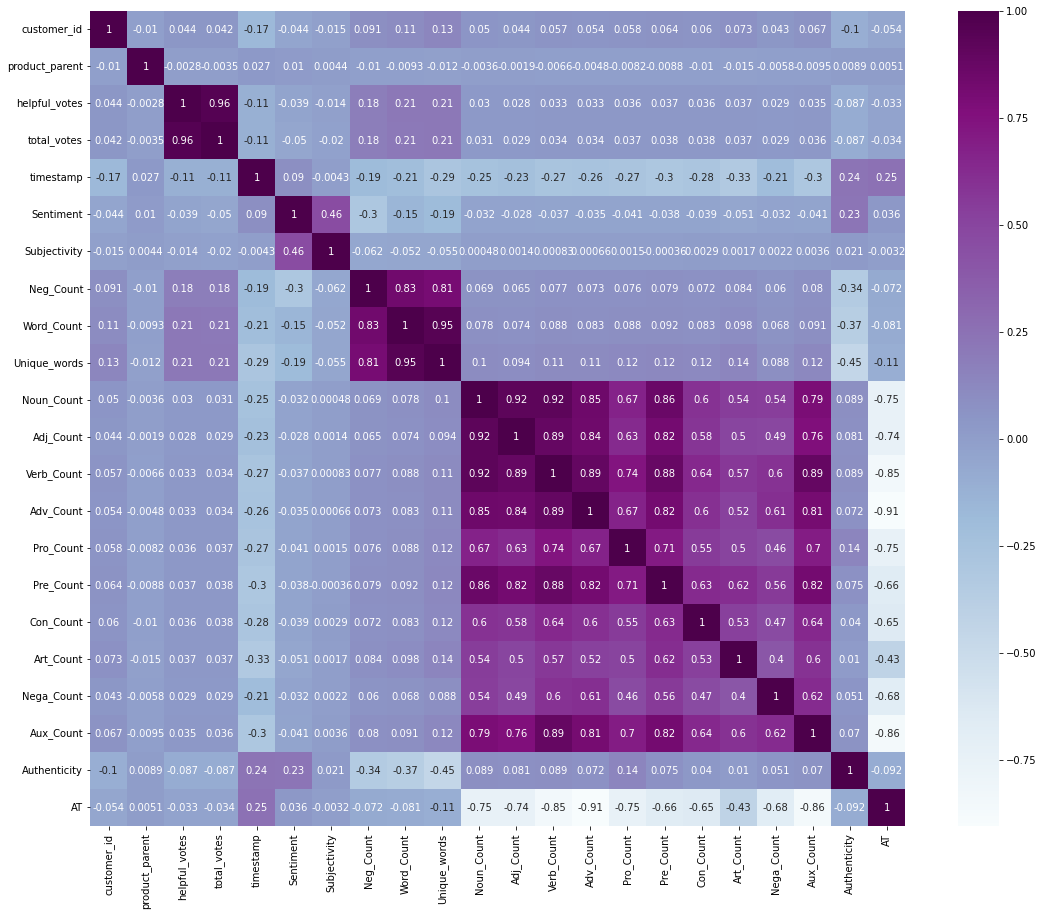

In [ ]:

import seaborn as sns
matrix= df.corr()
f,ax=plt.subplots(figsize=(19, 15))
sns.heatmap(matrix,vmax=1,square=True,cmap="BuPu", annot=True)


### FEATURE SELECTION

In [ ]:
df.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
timestamp            float64
IP Address            object
Sentiment            float64
Subjectivity         float64
Neg_Count              int64
Word_Count             int64
Unique_words           int64
Noun_Count           float64
Adj_Count            float64
Verb_Count           float64
Adv_Count            float64
Pro_Count            float64
Pre_Count            float64
Con_Count            float64
Art_Count            float64
Nega_Count           float64
Aux_Count            float64
Authenticity         float64
AT                   float64
dtype: object

In [ ]:
print(df.isnull().sum())

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           5
helpful_votes        13
total_votes          13
vine                 13
verified_purchase    13
review_headline      15
review_body           0
review_date          18
timestamp            26
IP Address            0
Sentiment             0
Subjectivity          0
Neg_Count             0
Word_Count            0
Unique_words          0
Noun_Count            0
Adj_Count             0
Verb_Count            0
Adv_Count             0
Pro_Count             0
Pre_Count             0
Con_Count             0
Art_Count             0
Nega_Count            0
Aux_Count             0
Authenticity         10
AT                    0
dtype: int64


In [ ]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Verb_Count,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,4.0,2.0,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,7.0,1.0,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0


To use FUZZY LOGIC we are going to use the following columns only:

sentiment, verified_purchase, one new column to store whether review is:
Positive Fake/Genuine, Moderate Fake/Genuine, Negative Fake/Genuine                                                            

let us use new dataframe df1 to perform fuzzy logic	


In [ ]:
df1=df

In [ ]:
df1

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Verb_Count,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,4.0,2.0,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,7.0,1.0,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0


In [ ]:
encoded_label_dict = {"N" : 0, "Y" : 1}
def encode_label(x):
    return encoded_label_dict.get(x,-1)


In [ ]:
df1["verified_purchase"] = df1["verified_purchase"].apply(lambda x: encode_label(x))

In [ ]:
df1

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Verb_Count,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,4.0,2.0,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,7.0,1.0,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0


## BUILD FUZZY LOGIC MODEL

In [ ]:
!pip install --upgrade pip
!pip install skfuzzy
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
ERROR: Could not find a version that satisfies the requirement skfuzzy (from versions: none)
ERROR: No matching distribution found for skfuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.3 MB/s eta 0:00:00
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894071 sha256=bec8a8803ab1bf14c92a3f2b2d276a996de0ee01d046542cdac18bd095b352f7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
Sentiment = ctrl.Antecedent(np.arange(-1,1,0.01),'Sentiment')
verified_purchase=ctrl.Antecedent(np.arange(0,1.1,0.1),'verified_purchase')
Genuinity=ctrl.Consequent(np.arange(0,1,0.01),'Genuinity')

In [ ]:
Sentiment['negative']= fuzz.gaussmf(Sentiment.universe,-1, 0.25)
Sentiment['moderate']= fuzz.gaussmf(Sentiment.universe,0, 0.15)
Sentiment['positive']= fuzz.gaussmf(Sentiment.universe, 1, 0.25)



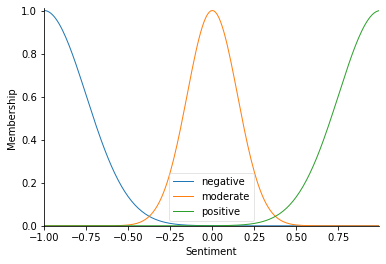

In [ ]:
Sentiment.view()

In [ ]:
verified_purchase['not_verified']= fuzz.trimf(verified_purchase.universe,[0,0,0])
verified_purchase['verified']= fuzz.trimf(verified_purchase.universe,[1,1,1])


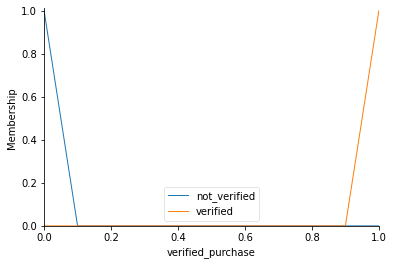

In [ ]:
verified_purchase.view()

In [ ]:
Genuinity['not_genuine']= fuzz.gaussmf(Genuinity.universe,0, 0.25)
Genuinity['moderately_genuine']= fuzz.gaussmf(Genuinity.universe,0.5, 0.15)
Genuinity['genuine']= fuzz.gaussmf(Genuinity.universe, 1, 0.25)


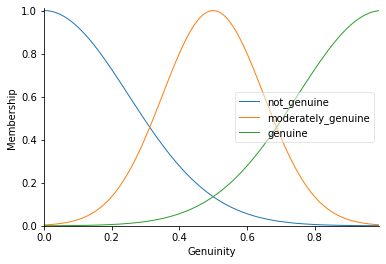

In [ ]:
Genuinity.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

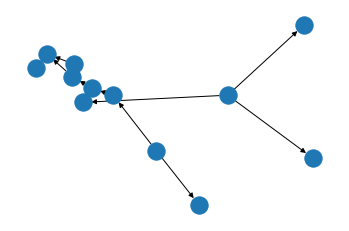

In [ ]:
rule1=ctrl.Rule(Sentiment['negative'] & verified_purchase['not_verified'], Genuinity['not_genuine'])
rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

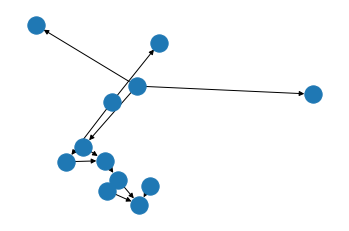

In [ ]:
rule2=ctrl.Rule(Sentiment['positive'] & verified_purchase['not_verified'], Genuinity['not_genuine'])
rule2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

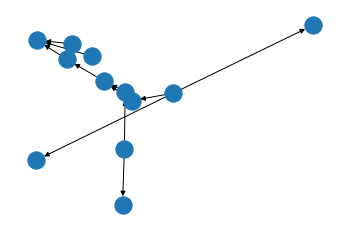

In [ ]:
rule3=ctrl.Rule(Sentiment['negative'] & verified_purchase['verified'], Genuinity['moderately_genuine'])
rule3.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

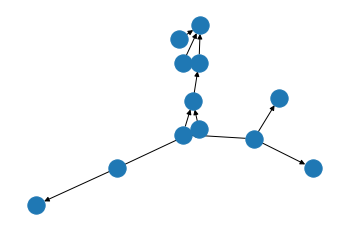

In [ ]:
rule4=ctrl.Rule(Sentiment['positive'] & verified_purchase['verified'], Genuinity['moderately_genuine'])
rule4.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

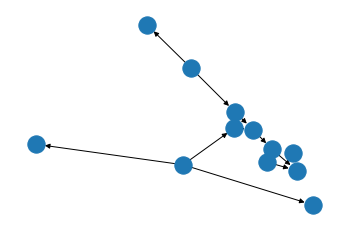

In [ ]:
rule5=ctrl.Rule(Sentiment['moderate'] & verified_purchase['verified'], Genuinity['genuine'])
rule5.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

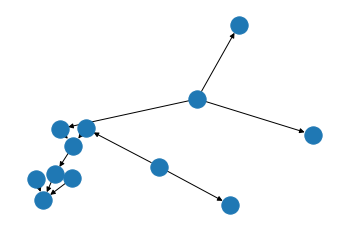

In [ ]:
rule6=ctrl.Rule(Sentiment['moderate'] & verified_purchase['not_verified'], Genuinity['moderately_genuine'])
rule6.view()

In [ ]:
fake_review_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
fake_review=ctrl.ControlSystemSimulation(fake_review_ctrl)

In [ ]:
fake_review.input['Sentiment']=0.2
fake_review.input['verified_purchase']=1
fake_review.compute()

In [ ]:
print(fake_review.output['Genuinity'])

0.742184489121376


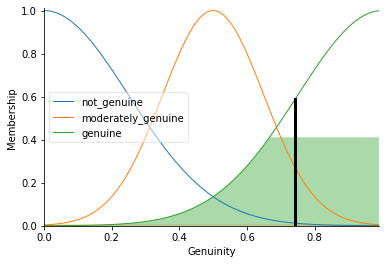

In [ ]:
Genuinity.view(sim=fake_review)

## APPLY FUZZY LOGIC MODEL

In [ ]:
# create new column called Genuinity (this column will display whether the review is fake or genuine in numeric terms)
df1['Genuinity']=np.nan

for i in range(len(df1)):
    fake_review.input['Sentiment']=df1['Sentiment'][i]
    fake_review.input['verified_purchase']=df1['verified_purchase'][i]
    fake_review.compute()
    df1['Genuinity'][i]=fake_review.output['Genuinity']

df1

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,2.0,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,1.0,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938


In [ ]:
# if Genuinity value is between 0 and 0.25 then label="Not Genuine"
# if Genuinity value is between 0.25 and 0.75 then Genuinity=" Moderately Genuine"
# if Genuinity value is between 0.75 and 1 then label="Genuine"
df1['label']=np.nan
for i in range (len(df1)):
    if ((df1.loc[i,'Genuinity']>=0) & (df1.loc[i,'Genuinity']<0.25)):
        df1.loc[i,'label']= "Not Genuine"
    elif ((df1.loc[i,'Genuinity']>=0.25) & (df1.loc[i,'Genuinity']<0.75)):
        df1.loc[i,'label']= "Moderately Genuine"
    elif df1.loc[i,'Genuinity']>=0.75:
        df1.loc[i,'label']= "Genuine"


In [ ]:
df1

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


## SPLIT DATASET INTO MODERATELY GENUINE AND (GENUINE_AND_NOTGENUINE)

df2 consists of rows labeled as moderately genuine these rows need to be processed further i.e. labeled as Genuine or Not Genuine using trained ML models

df3 consists of rows labeled Genuine and Not Genuine

### MODERATELY GENUINE

In [ ]:
df2=df1[df1['label'] == 'Moderately Genuine']
df2.to_csv('Moderately_Genuine.csv',index=False)
df2

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,1.0,0.928571,32.0,0.499943,Moderately Genuine
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.333333,28.0,0.499936,Moderately Genuine
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.083333,30.0,0.499877,Moderately Genuine
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,28.0,0.742184,Moderately Genuine
5,US,7846966,RY8DDL22YG4R5,B00KA6CCVY,563475445,Aweek® Air Acoustic Earpiece Headset for Baofe...,Mobile_Electronics,3,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,3.0,0.958333,24.0,0.675685,Moderately Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88573,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,23.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.521401,30.0,0.499941,Moderately Genuine
88574,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.732558,30.0,0.499705,Moderately Genuine
88575,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.676190,30.0,0.499595,Moderately Genuine
88576,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5,58.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.479109,30.0,0.499938,Moderately Genuine


In [ ]:
df2remcol=df2[['review_id','verified_purchase','Sentiment','review_body','Genuinity','label']]
df2remcol

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
0,R8MEA6IGAHO0B,1,1.000000,as advertised everything works perfectly i a...,0.499943,Moderately Genuine
1,R31LOQ8JGLPRLK,1,0.800000,it is great,0.499936,Moderately Genuine
2,R2Y0MM9YE6OP3P,1,0.600000,these work great and fit my life proof case fo...,0.499877,Moderately Genuine
3,RRB9C05HDOD4O,1,0.200000,work very well,0.742184,Moderately Genuine
5,RY8DDL22YG4R5,1,0.287500,it appears to be good but i am still waiting ...,0.675685,Moderately Genuine
...,...,...,...,...,...,...
88573,R2CDRVDUKB5Z9P,0,0.079590,i have been looking for a while for the pur...,0.499941,Moderately Genuine
88574,R1DVLTZFXXOX9,0,0.222462,we live in an apartment with hardwood floors a...,0.499705,Moderately Genuine
88575,R1GHKKZMHAHQC1,0,0.231818,i received this for a birthday present and its...,0.499595,Moderately Genuine
88576,R227G6T5B26DVC,0,0.105658,i got the dirt devil spot scrubber for a gift ...,0.499938,Moderately Genuine


,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
0,R8MEA6IGAHO0B,1,1.0,as advertised everything works perfectly i a...,0.499943,Moderately Genuine
7,R8MEA6IGAHO0B,1,1.0,as advertised everything works perfectly i a...,0.499943,Moderately Genuine
8,R8MEA6IGAHO0B,1,1.0,as advertised everything works perfectly i a...,0.499943,Moderately Genuine


0.4999428074765137
for review_id = R8MEA6IGAHO0B 


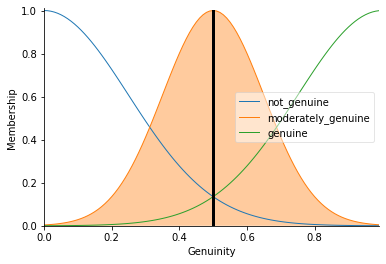

In [ ]:
display(df2remcol.loc[(df2remcol['review_id'] =='R8MEA6IGAHO0B')])
fake_review.input['Sentiment']=1 #extreme positive
fake_review.input['verified_purchase']=1  #verified
fake_review.compute()
print(fake_review.output['Genuinity']) #moderately_genuine
Genuinity.view(sim=fake_review)
print("for review_id = R8MEA6IGAHO0B ")

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
24,R5KCRE927NYMU,0,0.075,just arrived read instructions and attacked ...,0.499941,Moderately Genuine


0.4999409839535856
for review_id = R5KCRE927NYMU


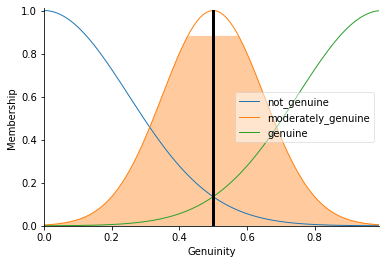

In [ ]:
display(df2remcol.loc[(df2remcol['review_id'] =='R5KCRE927NYMU')])
fake_review.input['Sentiment']=0.075 #moderate sentiment
fake_review.input['verified_purchase']=0 #not verified
fake_review.compute()
print(fake_review.output['Genuinity']) # moderately genuine
Genuinity.view(sim=fake_review)
print("for review_id = R5KCRE927NYMU")

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
313,R2MEKKYG0FQ9Y4,1,-0.955,this was a awful product and and very bad cust...,0.499943,Moderately Genuine


0.4999427213558205
for review_id = R2MEKKYG0FQ9Y4


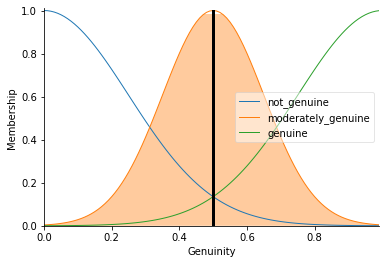

In [ ]:
display(df2remcol.loc[(df2remcol['review_id'] =='R2MEKKYG0FQ9Y4')])
fake_review.input['Sentiment']=-0.9549999999999998 #extreme negative sentiment
fake_review.input['verified_purchase']=1 #verified
fake_review.compute()
print(fake_review.output['Genuinity']) # moderately genuine
Genuinity.view(sim=fake_review)
print("for review_id = R2MEKKYG0FQ9Y4")

### GENUINE_NOT GENUINE

In [ ]:
df3= df1[(df1['label']=='Not Genuine') | (df1['label']=='Genuine')]

df3.to_csv('Genuine_NotGenuine.csv',index=False)
df3

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Genuinity,label
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911,Genuine
6,US,21299354,R2AT2426ZHFUHH,B00MJCDPM2,563475445,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,Mobile_Electronics,3,0.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.727273,29.0,0.793541,Genuine
12,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,4.0,0.920000,25.0,0.788911,Genuine
14,US,21299354,R2AT2426ZHFUHH,B00MJCDPM2,754171872,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,Mobile_Electronics,3,0.0,1.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.727273,29.0,0.793541,Genuine
22,US,18944032,R3TZNSOXS13SIG,B00W6OLUGQ,577462547,DTK® AMI MDI MMI Adapter 8-PIN Lightning Cable...,Mobile_Electronics,2,1.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.166667,30.0,0.794149,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88439,US,38056064,R1CSEQKUEBIIY8,B00026IDG0,70026790,Cowon iAUDIO 6 - Digital player / radio - HDD ...,Mobile_Electronics,5,7.0,7.0,...,3.0,3.0,1.0,2.0,1.0,1.0,0.333704,28.0,0.759495,Genuine
88483,US,26663400,R160TNIIRSNKJ0,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,1,0.0,8.0,...,1.0,1.0,0.0,2.0,0.0,2.0,1.000000,27.0,0.199434,Not Genuine
88488,US,30969863,R2BZOEH3ENFZ1L,B00006J05N,777995919,Crosley Mini Bubbler Jukebox (WR18-CR),Mobile_Electronics,5,4.0,12.0,...,2.0,2.0,1.0,2.0,1.0,2.0,1.285714,22.0,0.753143,Genuine
88543,US,51959593,RCE301XOYH19Z,B00006I580,904373353,DIGISETTE DUO-MP3 E-Cassette Player ( Windows ),Mobile_Electronics,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,30.0,0.789298,Genuine


In [ ]:
df3remcol=df3[['review_id','verified_purchase','Sentiment','review_body','Genuinity','label']]
df3remcol

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
4,R26I2RI1GFV8QG,1,0.079167,be careful with these products i have bought ...,0.788911,Genuine
6,R2AT2426ZHFUHH,1,-0.037879,first one arrived as a brick would not work ...,0.793541,Genuine
12,R26I2RI1GFV8QG,1,0.079167,be careful with these products i have bought ...,0.788911,Genuine
14,R2AT2426ZHFUHH,1,-0.037879,first one arrived as a brick would not work ...,0.793541,Genuine
22,R3TZNSOXS13SIG,1,0.000000,you need to plug in both,0.794149,Genuine
...,...,...,...,...,...,...
88439,R1CSEQKUEBIIY8,1,0.167247,i was deciding between the iriver and this les...,0.759495,Genuine
88483,R160TNIIRSNKJ0,0,-1.000000,horrible it does not work at all how can the...,0.199434,Not Genuine
88488,R2BZOEH3ENFZ1L,1,0.180000,fast shipment well packaged highly recommend...,0.753143,Genuine
88543,RCE301XOYH19Z,1,-0.076923,this item worked well for a couple of weeks bu...,0.789298,Genuine


,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
23,R12UBZT87UX3AP,1,0.0,worked with mhd flasher for android used to ...,0.794149,Genuine


0.7941485551380435
for review_id = R12UBZT87UX3AP


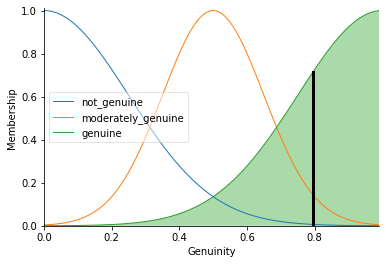

In [ ]:
display(df3remcol.loc[(df3remcol['review_id'] =='R12UBZT87UX3AP')])
fake_review.input['Sentiment']=0 #moderate sentiment
fake_review.input['verified_purchase']=1 #verified
fake_review.compute()
print(fake_review.output['Genuinity']) #Genuine
Genuinity.view(sim=fake_review)
print("for review_id = R12UBZT87UX3AP")

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
309,R23LR9XPX8DA6G,0,0.85,awesome i loved it,0.207258,Not Genuine


0.20725815235942055
for review_id = R12UBZT87UX3AP


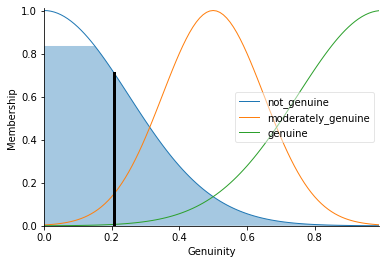

In [ ]:
display(df3remcol.loc[(df3remcol['review_id'] =='R23LR9XPX8DA6G')])
fake_review.input['Sentiment']=0.85 # extreme positive sentiment
fake_review.input['verified_purchase']=0 #not verified
fake_review.compute()
print(fake_review.output['Genuinity']) #Not Genuine
Genuinity.view(sim=fake_review)
print("for review_id = R12UBZT87UX3AP")

,review_id,verified_purchase,Sentiment,review_body,Genuinity,label
77960,R2AZ1B8J71H6KX,0,-1.0,after a couple months the battery will not ho...,0.199434,Not Genuine


0.1994340775074116
for review_id = R12UBZT87UX3AP


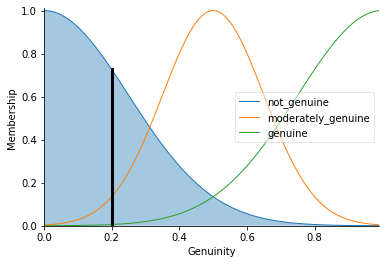

In [ ]:
display(df3remcol.loc[(df3remcol['review_id'] =='R2AZ1B8J71H6KX')])
fake_review.input['Sentiment']=-1 # extreme negative sentiment
fake_review.input['verified_purchase']=0 #not verified
fake_review.compute()
print(fake_review.output['Genuinity']) #Not Genuine
Genuinity.view(sim=fake_review)
print("for review_id = R12UBZT87UX3AP")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d611ce83-46e4-4a42-b601-819324222ef9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>